### __Note: This notebook has been built base on [ika-rwth-aachen/acdc-notebooks](https://github.com/ika-rwth-aachen/acdc-notebooks). Fell free to check the original repository and give them a star if you like ;)__

# Introduction

The purpose of notebook is to conevert images into a topview (Birds Eye View) transformation using OpenCV.  

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

We will first load one image to test the transformation

In [2]:
def show_image(img, title=None):
    """this function shows an opencv image in this notebook"""
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    if title is not None:
        plt.title(title)
    plt.show()

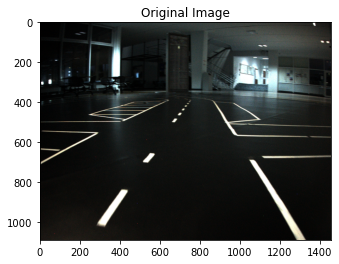

In [3]:
# read image
img = cv2.imread("input_images/125.png")
# show image 
show_image(img, "Original Image")

# Inverse Perspective Transform

Here, we can apply IPM to one of the loaded image. Note,

- Source Points (`src_pts`): These are the points on the input image (image that you want to transform) that define the region you want to transform. These points correspond to the coordinates of a quadrilateral in the input image.

- Destination Points (`dst_pts`): These are the points where the source points will be mapped after the perspective transformation. They represent the coordinates of the corresponding quadrilateral in the output image.

- `P_cam_to_bev` is the perspective transformation matrix calculated using the cv2.getPerspectiveTransform() function. This matrix defines the transformation from the source points to the destination points.

- `cv2.warpPerspective()` applies the perspective transformation to the input image (img) based on the calculated transformation matrix P_cam_to_bev. It generates the transformed output image based on the specified destination size (defined by height and width).



[[-5.06922166e-01 -2.62232736e+00  1.22810755e+03]
 [-2.03396860e-02 -3.61881009e+00  1.41294320e+03]
 [-4.67364108e-05 -3.09050716e-03  1.00000000e+00]]


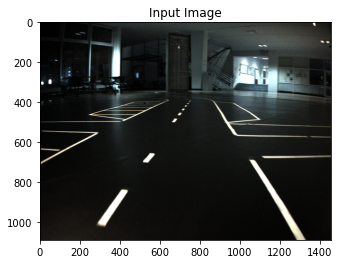

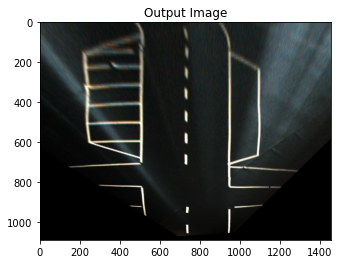

In [4]:
# size of output image
height, width = 1088, 1456
#height, width = 1200, 1200

# define the source points
#x_c_1, x_c_2, x_c_3, x_c_4 = [590,618], [1010,618], [1120,781], [455,781]
#x_c_1, x_c_2, x_c_3, x_c_4 = [410,490], [1000,490], [1200,700], [1,700]
x_c_1, x_c_2, x_c_3, x_c_4 = [555,430], [890,430], [975,560], [297,549]


src_pts = np.float32([x_c_1, x_c_2, x_c_3, x_c_4])
# define the destination points 
#x_r_1, x_r_2, x_r_3, x_r_4 = [0.3 * width, height *0.4], [0.7 * width, height * 0.4], [0.7 * width, height * 0.8],[0.3 * width, height * 0.8]
#x_r_1, x_r_2, x_r_3, x_r_4 = [0.37 * width, height *0.54], [0.63 * width, height * 0.54], [0.63 * width, height * 0.82],[0.37 * width, height * 0.82]
x_r_1, x_r_2, x_r_3, x_r_4 = [0.35 * width, height *0.4], [0.65 * width, height * 0.4], [0.65 * width, height * 0.75],[0.35 * width, height * 0.75]

dst_pts =np.float32([x_r_1, x_r_2, x_r_3, x_r_4])

# calculate the perspective transform matrix
P_cam_to_bev = cv2.getPerspectiveTransform(src_pts, dst_pts)
print (P_cam_to_bev)

# caculate the output image
#output = cv2.warpPerspective(img ,P_cam_to_bev, (width,height))
output = cv2.warpPerspective(img ,P_cam_to_bev, img.shape[:2][::-1])

show_image(img, "Input Image")
show_image(output, "Output Image")


With the below cells, transformation can be visualized more easily. Check the quadrilateral drawn below and adjust your source and destination points to get a perfect transformation

In [5]:
# function to draw a line
def draw_line(image, pt1, pt2, color=(0,0,255), thickness=5):
    print(pt1, pt2)
    cv2.line(image, pt1.astype(int), pt2.astype(int), color, thickness)
    
# function to draw rectanges:
def draw_rectange(image, pts, color=(0,0,255), thickness=5):
    draw_line(image, pts[0], pts[1], color, thickness)
    draw_line(image, pts[1], pts[2], color, thickness)
    draw_line(image, pts[2], pts[3], color, thickness)
    draw_line(image, pts[3], pts[0], color, thickness)

[555. 430.] [890. 430.]
[890. 430.] [975. 560.]
[975. 560.] [297. 549.]
[297. 549.] [555. 430.]
[509.6 435.2] [946.4 435.2]
[946.4 435.2] [946.4 816. ]
[946.4 816. ] [509.6 816. ]
[509.6 816. ] [509.6 435.2]


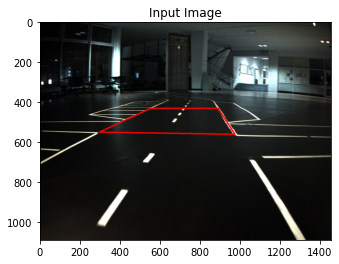

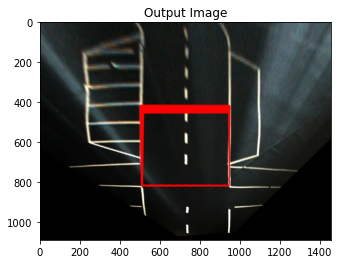

In [6]:
# draw a rectange that shows the source points
draw_rectange(img, src_pts)
# draw a rectangle that shows the destination points
draw_rectange(output, dst_pts)
# caculate the output image
output =cv2.warpPerspective(img ,P_cam_to_bev, (width,height))


show_image(img, "Input Image")
show_image(output, "Output Image")

Once the testing is finished use the final source and destinations points below.

In [7]:

# define the source points
x_c_1, x_c_2, x_c_3, x_c_4 = [555,430], [890,430], [975,560], [297,549]

# define the destination points 
x_r_1, x_r_2, x_r_3, x_r_4 = [0.35 * width, height *0.4], [0.65 * width, height * 0.4], [0.65 * width, height * 0.75],[0.35 * width, height * 0.75]


def perspective_transform(input_folder, output_folder, dst_width, dst_height):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith('.png'):
            # Read the image
            img = cv2.imread(os.path.join(input_folder, filename))

            # Define source points
            src_pts = np.float32([x_c_1, x_c_2, x_c_3, x_c_4])

            # Define destination points
            dst_pts = np.float32([x_r_1, x_r_2, x_r_3, x_r_4])

            # Calculate the perspective transformation matrix
            P_cam_to_bev = cv2.getPerspectiveTransform(src_pts, dst_pts)

            # Calculate the output image
            output = cv2.warpPerspective(img, P_cam_to_bev, (dst_width, dst_height))

            # Save the output image to the output folder
            output_filename = os.path.join(output_folder, filename)
            cv2.imwrite(output_filename, output)

            print(f"Processed: {filename}")




Finally add details to the input and output paths to transform the dataset into a BEV form.

In [ ]:
# Specify your input and output folders and the desired width and height
input_folder = 'input_images'
output_folder = 'output_images'
dst_width = 1456  # Adjust as needed
dst_height = 1088  # Adjust as needed

# Perform the perspective transformation on all images in the input folder
perspective_transform(input_folder, output_folder, dst_width, dst_height)